In [65]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv('bio copy.csv')
gender = {"M":1,"F":0}
data["Gender"] = data["Gender"].map(gender)
data.dropna(inplace=True)
data.drop(34, inplace=True)
data.reset_index(drop=True, inplace=True)
X = data[["Age","Gender","BMI","Body weight ","Height "]].values
data["HOMA-IR"] = data["Fasting GLU - PDL (Lab)"] * data["Insulin "] / 405
y = data["HOMA-IR"].values.reshape(-1, 1)

In [67]:
X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  # shape (n_samples, 6)

# Solve normal equation: beta = (X^T X)^-1 X^T y
beta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

print(beta)


[[ 3.26248986e+01]
 [ 1.44460812e-02]
 [-5.62771965e-02]
 [-2.50441496e-01]
 [ 7.12804650e-02]
 [-5.36531347e-01]]


In [68]:
x_new = np.array([[25.0, 1, 30, 150, 85]]) 

x_new_bias = np.hstack([np.ones((x_new.shape[0], 1)), x_new])

y_pred_all = X_bias @ beta

ss_total = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y - y_pred_all)**2)
r2 = 1 - (ss_res / ss_total)
r = np.sqrt(r2)
print(f"R-squared: {r2:.4f}")
print(f"R: {r:.4f}")

R-squared: 0.4412
R: 0.6642


Predicted HOMA-IR: -61.75107441527635


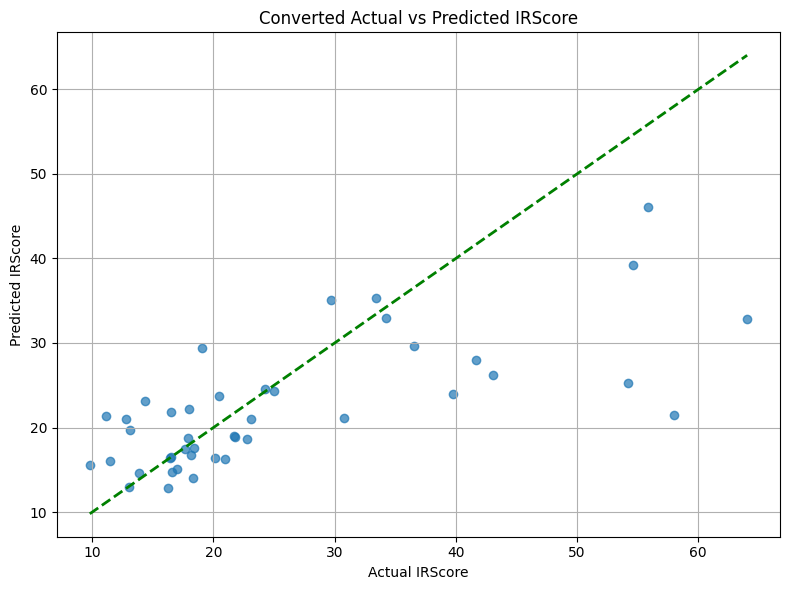

: 

In [ ]:
x_new = np.array([[25.0, 1, 22.5, 68.0, 175.0]])  # Age, Gender, BMI, Body weight, Height
x_new_bias = np.hstack([np.ones((x_new.shape[0], 1)), x_new])
y_pred = x_new_bias @ beta
print("Predicted HOMA-IR:", y_pred[0, 0])


def convert(x):
    return 100/(x+1)

converted_actual = convert(y)
converted_predicted = convert(y_pred_all)

# Plot: Actual vs Predicted

plt.figure(figsize=(8, 6))
plt.scatter(converted_actual, converted_predicted, alpha=0.7)
plt.plot([converted_actual.min(), converted_actual.max()],
         [converted_actual.min(), converted_actual.max()],
         color='green', linestyle='--', linewidth=2)
plt.xlabel("Actual IRScore")
plt.ylabel("Predicted IRScore")
plt.title("Converted Actual vs Predicted IRScore")
plt.grid(True)
plt.tight_layout()
plt.show()